In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns

In [2]:
data=pd.read_csv('HAM10000_metadata.csv')


In [3]:
data=data.drop(columns=['lesion_id'])


In [4]:
data.head()


,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
data.dx

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [6]:
data.columns

Index(['image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [7]:
data.shape

(10015, 6)

In [8]:
df_drop_dup = data.drop_duplicates() #Drops all the redundent values

In [9]:
df_drop_dup.shape

(10015, 6)

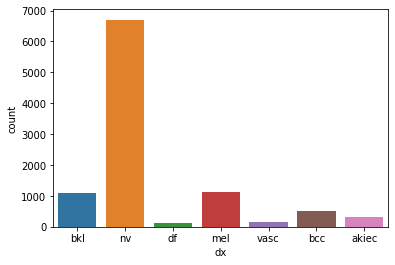

In [10]:
sns.countplot(data.dx)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.dx= le.fit_transform(data.dx)
data.dx_type= le.fit_transform(data.dx_type)
data.sex= le.fit_transform(data.sex)
data.localization= le.fit_transform(data.localization)

In [12]:
data

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,2,3,80.0,1,11
1,ISIC_0025030,2,3,80.0,1,11
2,ISIC_0026769,2,3,80.0,1,11
3,ISIC_0025661,2,3,80.0,1,11
4,ISIC_0031633,2,3,75.0,1,4
...,...,...,...,...,...,...
10010,ISIC_0033084,0,3,40.0,1,0
10011,ISIC_0033550,0,3,40.0,1,0
10012,ISIC_0033536,0,3,40.0,1,0
10013,ISIC_0032854,0,3,80.0,1,5


In [13]:
import seaborn as sns
sns.set(color_codes = True)

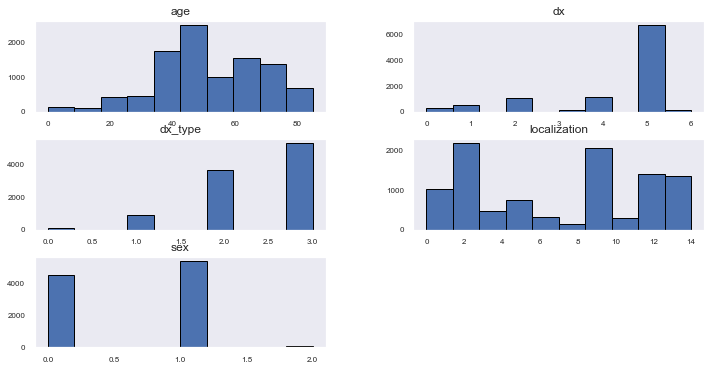

In [14]:
# looking over how different features are distributed in data
data.hist(edgecolor='black',grid=False,xlabelsize=8,ylabelsize=8)
fig=plt.gcf()
fig.set_size_inches(12,6)

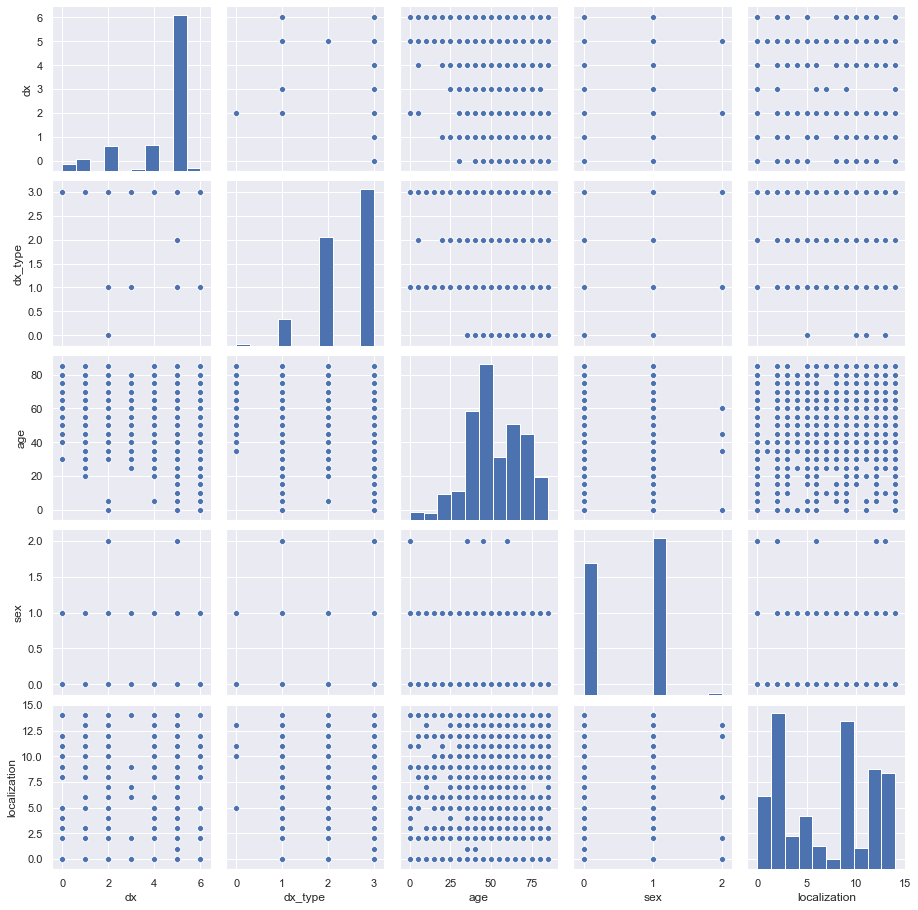

In [15]:
sns.pairplot(data)

In [16]:
df=pd.read_csv('HAM10000_metadata.csv')

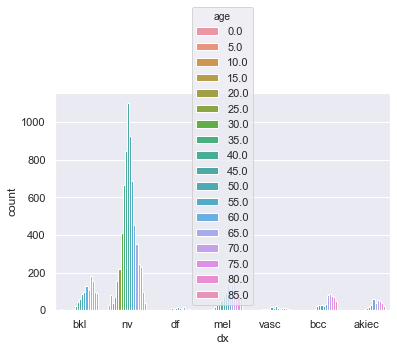

In [17]:
sns.countplot(x='dx',data=df,hue="age")

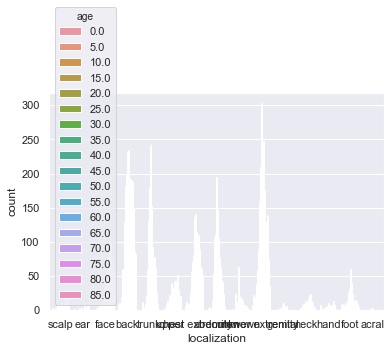

In [18]:
sns.countplot(x='localization',data=df,hue="age")

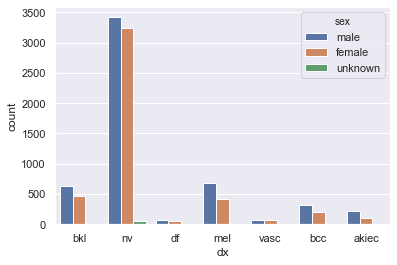

In [19]:
sns.countplot(x='dx',data=df,hue="sex")

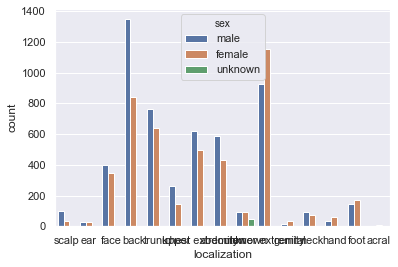

In [20]:
sns.countplot(x='localization',data=df,hue="sex")

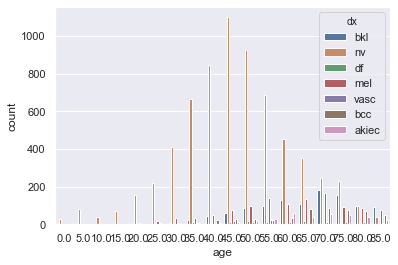

In [21]:
sns.countplot(x='age',data=df,hue="dx")

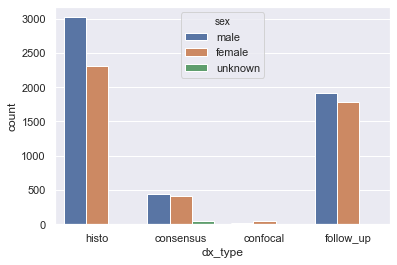

In [22]:
sns.countplot(x='dx_type',data=df,hue="sex")

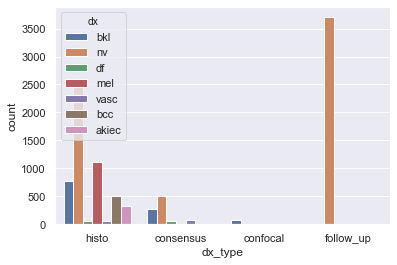

In [23]:
sns.countplot(x='dx_type',data=df,hue="dx")

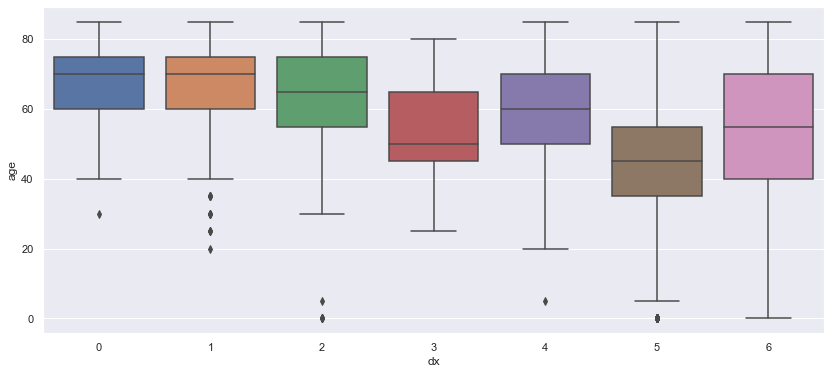

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x='dx',y='age',data=data)

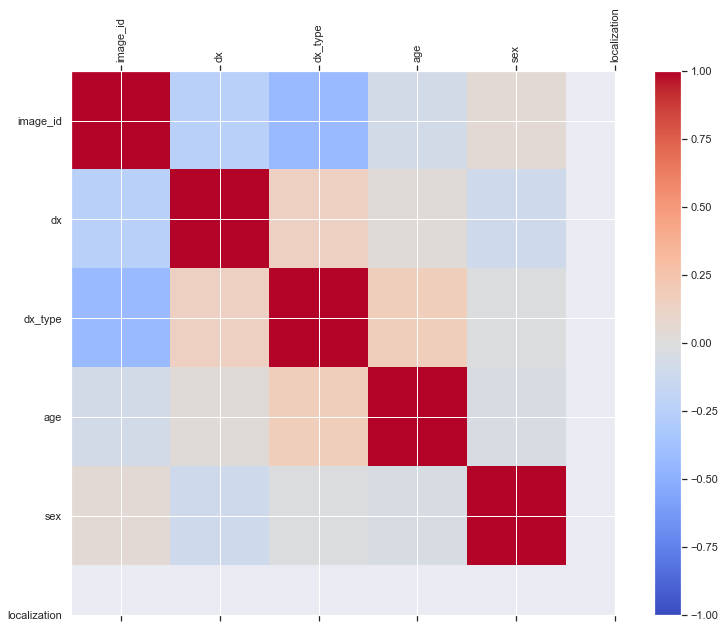

In [25]:
corr = data.corr()
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Univariate Distribution

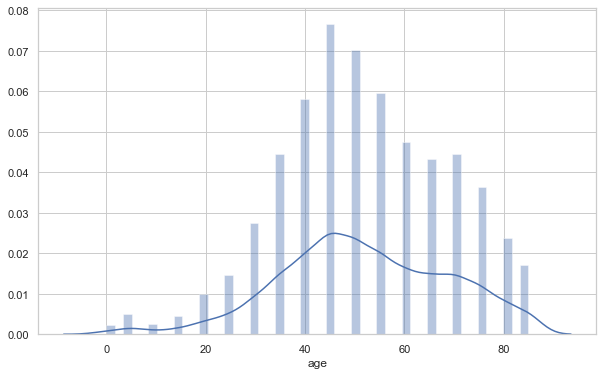

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(data['age'],bins=50)

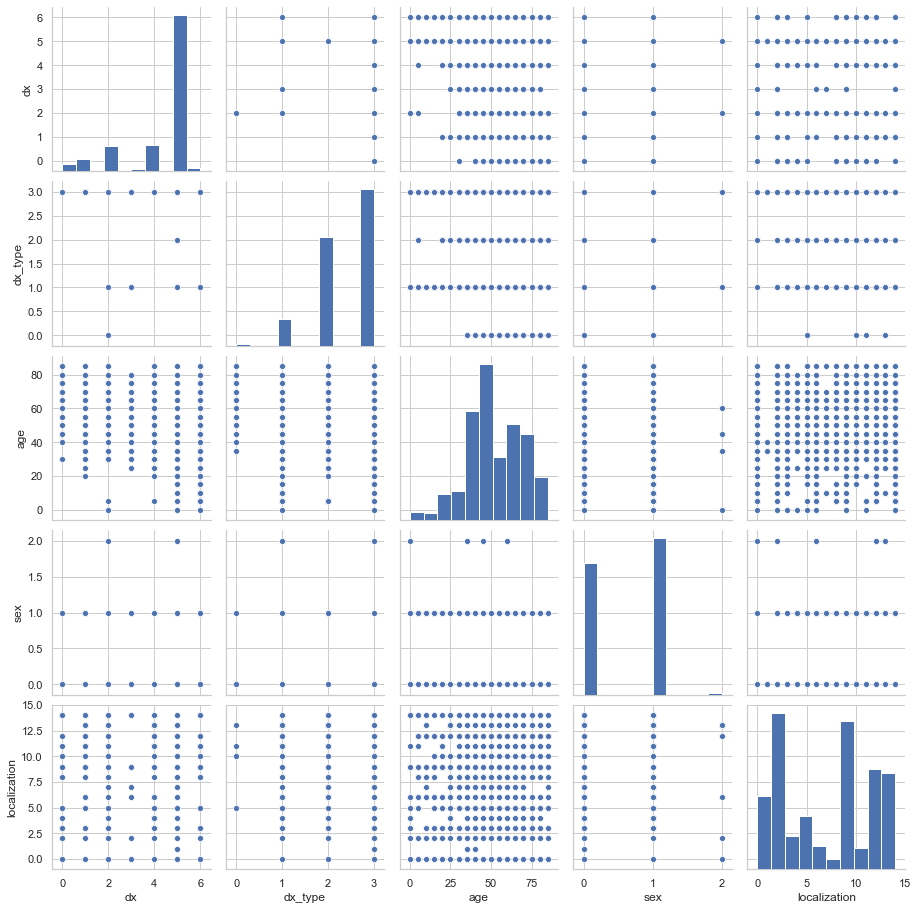

In [27]:
sns.pairplot(data)

In [28]:
data=data.dropna()


In [29]:
data.isnull().sum()


image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

# Countplot

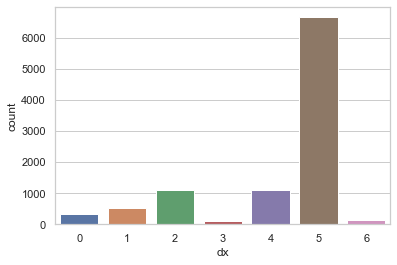

In [30]:
sns.countplot(data['dx'])


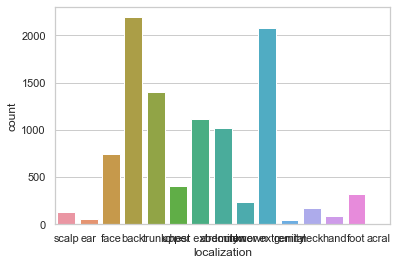

In [31]:
sns.countplot(df['localization'])


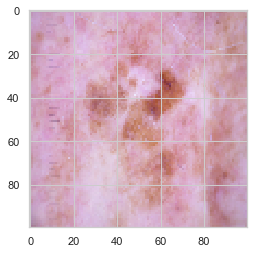

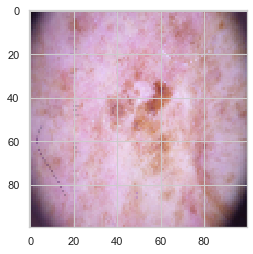

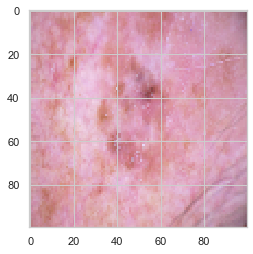

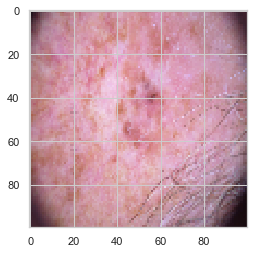

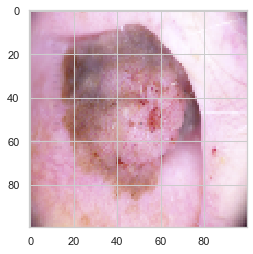

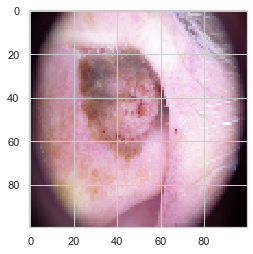

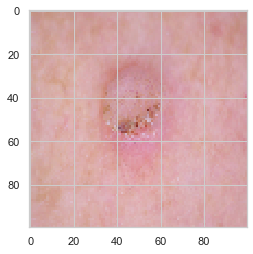

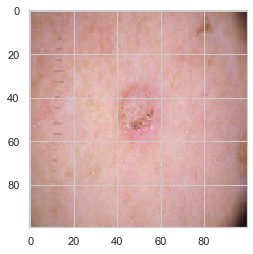

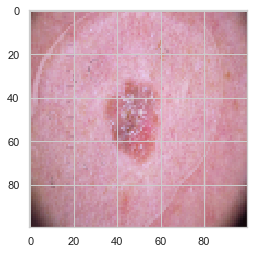

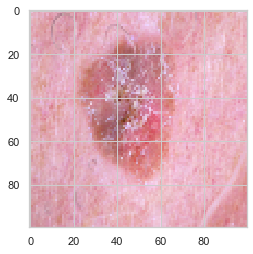

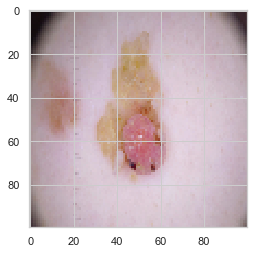

In [32]:
PATH='HAM10000_images_part_1'

#plot the data
count=0
for row in data.iterrows():
    
    
    #print(row[1][0])
   
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    
    plt.imshow(img_arr)
    plt.show() 
    
    if count==10:
        break
    count+=1


In [ ]:
PATH='HAM10000_images_part_1'

#plot the data
count=0
image_value = []


for row in data.iterrows():
    
    
    #print(row[1][0])
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1] ])
    

In [ ]:
len(image_value)


In [ ]:
image_value

In [ ]:
import random
random.shuffle(image_value)


In [ ]:
X=[]
y=[]

for feature,label in image_value:
    X.append(feature)
    y.append(label)

len(X),len(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
y=lbl.fit_transform(y)
y.shape


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)


In [ ]:
pip install TensorFlow

In [ ]:
from keras.utils import to_categorical

one_hot_train=to_categorical(train_y)
one_hot_train


In [ ]:
one_hot_test=to_categorical(test_y)
one_hot_test


In [ ]:
#array reshape
train_X=np.array(train_X).reshape(-1,100,100,3)
train_X=train_X/255.0
test_X=np.array(test_X).reshape(-1,100,100,3)
test_X=test_X/255.0

train_X.shape,test_X.shape,one_hot_train.shape,one_hot_test.shape


In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

'''model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))'''

model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))
model.summary()


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_X,one_hot_train,batch_size=128,epochs=10,validation_split=0.2)


In [ ]:
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
